# Plot ADAE Workloads
This notebook is used to plot the arrival rates of ADAE workloads from real-world traces.

We provide the following traces:
- Orinoquia Camera Trap Data (Network and Single Camera Trap)
- KABR Zebra Behavior Data from Drone Videos

In [24]:
# import libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Orinoquia Camera Trap Data

### Import and clean camera trap data

In [27]:
# read in camera trap data from json file
# data source: https://lila.science/datasets/orinoquia-camera-traps/
with open('data/raw_data/orinoquia_camera_traps.json') as f:
    data = json.load(f)

# create a dataframe of locations and datetimes
camera_trap = pd.DataFrame(data['images'])

# convert the datetime column to a datetime object
camera_trap['datetime'] = pd.to_datetime(camera_trap['datetime'])

# convert the location column to a string
camera_trap['location'] = camera_trap['location'].astype(str)

# create a new column for the date
camera_trap['date'] = camera_trap['datetime'].dt.date

# get create column of time
camera_trap['time'] = camera_trap['datetime'].dt.time

# extract arrival times from day 1 of the study
day_1 = camera_trap[camera_trap['date'] == camera_trap['date'].unique()[0]]

# sort the data by datetime
day_1 = day_1.sort_values('datetime')   

# get location 1 from day 1

# get unique locations
locations = camera_trap['location'].unique()
# get unique dates
dates = camera_trap['date'].unique()

location_1 = camera_trap[(camera_trap['date'] == dates[0]) & (camera_trap['location'] == locations[0])]


## Scale arrival times for network and single camera trap

In [29]:
# Scale the data to plot on same graph

# All arrival times from day 1
network_time_values = day_1['datetime'].values

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the time values to a 2D array if necessary
time_values = network_time_values.reshape(-1, 1)

# Scale the time values
network_scaled_time = scaler.fit_transform(time_values)

# Arrival times from location 1, day 1
single_time_values = location_1['datetime'].values

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the time values to a 2D array if necessary
time_values = single_time_values.reshape(-1, 1)

# Scale the time values
single_scaled_time = scaler.fit_transform(time_values)


### Visualize camera trap data

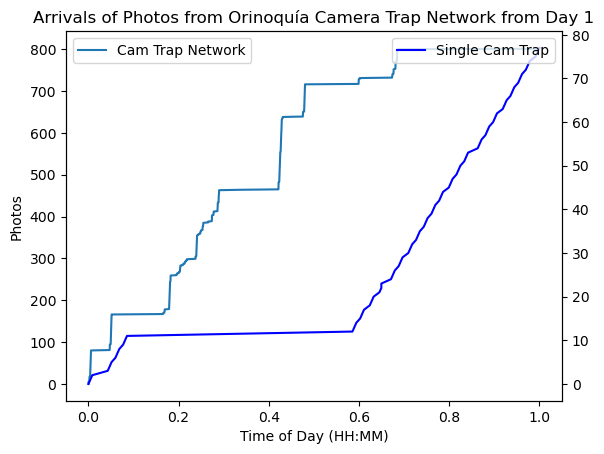

<Figure size 1000x500 with 0 Axes>

In [36]:
# plot the scaled time values
fig, ax = plt.subplots()
#ax.plot(single_scaled_time, range(len(single_scaled_time)))
ax.plot(network_scaled_time, range(len(network_scaled_time)))
plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Photos')
plt.title('Arrivals of Photos from Orinoquía Camera Trap Network from Day 1')
plt.legend(['Cam Trap Network'], loc='upper left')
#plt.ylim(0, len(single_scaled_time))
# add second y-axis
ax2 = ax.twinx()
ax2.plot(single_scaled_time, range(len(single_scaled_time)), color='blue')
plt.legend(['Single Cam Trap'], loc='upper right')
plt.figure(figsize=(10, 5))
plt.show()

## KABR Zebra Behavior Data

### Read in KABR data

In [42]:
# read in zebra data
behavior = pd.read_csv('data/cleaned_data/kabr_zebra_data.csv')

# drop 0 from time 
behavior = behavior[behavior['time'] != 0]

# count of each time 
behavior_counts = behavior['time'].value_counts()

# convert behavior counts to a dataframe
behavior_counts = behavior_counts.reset_index()

# reset first time to 0 
behavior_counts['time'] = behavior_counts['time'] - behavior_counts['time'].min()


### Plot KABR data

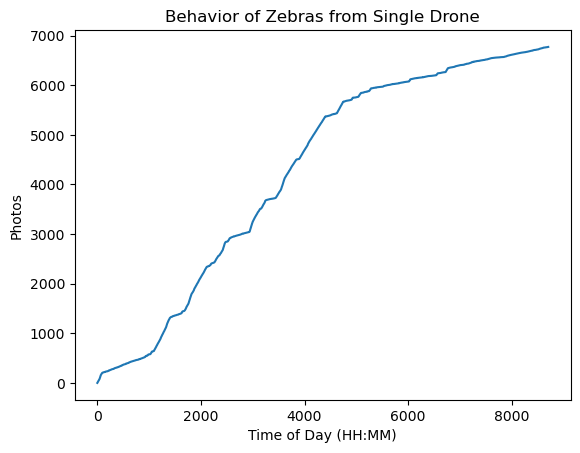

<Figure size 1000x500 with 0 Axes>

In [41]:
# plot the cumulative count of each arrival time 
fig, ax = plt.subplots()
ax.plot(behavior['time'], range(len(behavior['time'])))

plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Photos')
plt.title('Behavior of Zebras from Single Drone')
plt.figure(figsize=(10, 5))
plt.show()


### Scale KABR data

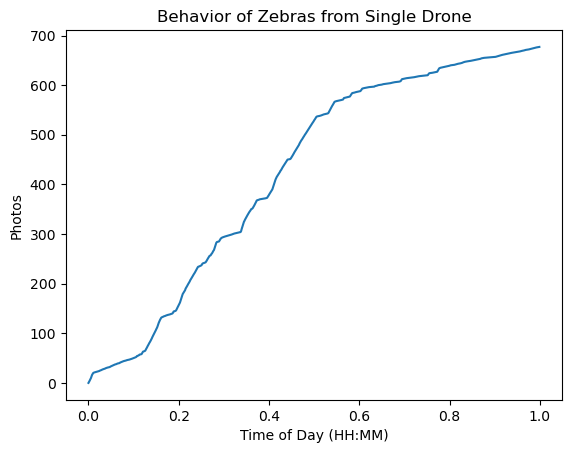

<Figure size 1000x500 with 0 Axes>

In [43]:
behavior_time_values = behavior['time'].values

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the time values to a 2D array if necessary
behavior_time_values = behavior_time_values.reshape(-1, 1)

# Scale the time values
behavior_scaled_time = scaler.fit_transform(behavior_time_values)

# remove every 10th value
behavior_scaled_time = behavior_scaled_time[::10]

# plot the cumulative count of each arrival time 
fig, ax = plt.subplots()
ax.plot(behavior_scaled_time, range(len(behavior_scaled_time)))

plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Photos')
plt.title('Behavior of Zebras from Single Drone')
plt.figure(figsize=(10, 5))
plt.show()

## Plot camera trap and KABR data together

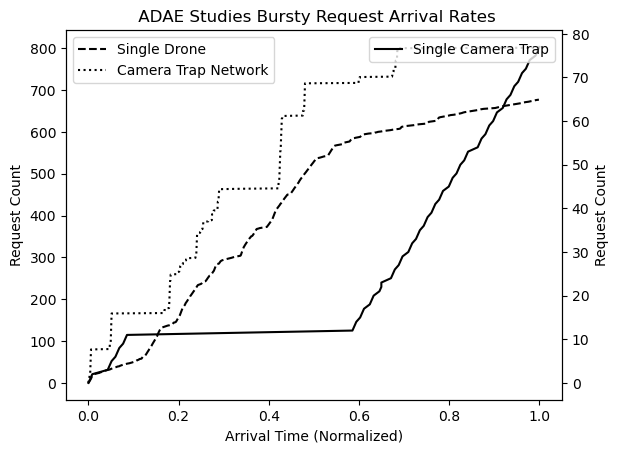

<Figure size 1000x500 with 0 Axes>

In [45]:
# plot the scaled time values
fig, ax = plt.subplots()

ax.plot(behavior_scaled_time, range(len(behavior_scaled_time)), label = 'Single Drone', color='black', linestyle='--')
# make line dashed

ax.plot(network_scaled_time, range(len(network_scaled_time)), label = 'Camera Trap Network', color='black', linestyle=':')
ax.legend(loc="upper left")
ax.set_ylabel('Request Count')
plt.xlabel('Arrival Time (Normalized)')
plt.ylabel('Request Count')
plt.title(' ADAE Studies Bursty Request Arrival Rates')

ax2 = ax.twinx()
ax2.plot(single_scaled_time, range(len(single_scaled_time)), label = 'Single Camera Trap', color='black')
ax2.set_ylabel('Request Count')
ax2.legend(loc="upper right")

plt.figure(figsize=(10, 5))
plt.show()

# save plt
fig.savefig('images/bursty_request_arrival_rates.png')